# Estatística Preditiva - Teste de Hipótese (T STUDENT)

## INTRODUÇÃO

### O **teste t de Student** ou somente teste t é um teste de hipótese que usa conceitos estatísticos para rejeitar ou não uma hipótese nula quando a estatística de teste (*t*) segue uma distribuição **t de Student**.

### Essa premissa é normalmente usada quando a estatística de teste, na verdade, segue uma distribuição normal, mas a *variância da população* é desconhecida. Nesse caso, é usada a *variância amostral* e, com esse ajuste, a estatística de teste passa a seguir uma distribuição t de Student.

#####❗Esse tipo de teste estatístico pode ser utilizado para avaliar a média corresponde a um único grupo de amostra e sua variável respectiva, como também podes ser utilizado para um grupo de duas amostras onde algum tipo de médidas de tendência central poderá ser utilizada. Sendo que quando dois grupos de amostras estão sendo comparados é importante destacar que o número amostral de cada grupo de variável a ser tratada deve ser o mesmo, ou seja, n1 = n2.❗



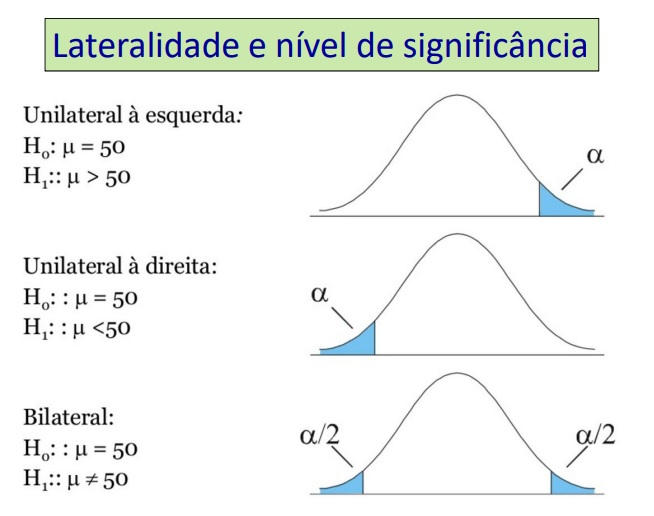

## TESTE PARA UM ÚNICO GRUPO DE AMOSTRA 

* No exemplo que segue, iremos utilizar o test t student para determinar se aceitamos ou não a **HIPÓTESE** de que a **média das idades** de pessoas de determinado grupo é de **30**.

In [1]:
# Importando as bibliotecas necessárias ao estudo.

from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd

In [2]:
"""Carregando os dados a serem analisados."""

ages = pd.read_csv('ages.csv')
#ages

In [3]:
# Descobrindo qual é a média amostral da idade dos grupo.

ages_mean = np.mean(ages)
print(ages_mean)


Ages    29.210526
dtype: float64


In [4]:
# Fazendo a chamada do t student test dentro da bilioteca e indicado que o teste é para uma única amostra.

tset, pval = ttest_1samp(ages, 29)
print('p-values = ',pval)

p-values =  [0.88457769]


In [5]:
# Resultados obtidos após inferências

if pval < 0.05:    # nível de confiança do teste é de 0.05 ou 5%
   print(" Nós estamos rejeitando a hipótese nula.")
else:
  print("Nós estamos aceitando a hiótese nula.")

we are accepting null hypothesis


## TESTE INDEPENDENTE
Utilizado para comparar a média entre dois grupos independentes, de forma a verificar se existe alguma evidência estatística considerável quanto a média populacional associada a esses dois grupos.

* Nesse exemplo iremos verificar se existe alguma associação entre dados amostrais de duas amsotras distintas relacioando semanas 1 e semana 2, onde os valores da base de dados são referentes aos faturamento diário de duas lojas situadas em estados distintos, onde:

H0: Existe associação (média faturamento) entre as lojas.

H1: Não existe associação (média faturamento) entre as lojas.


In [6]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

In [7]:
week1 = pd.read_csv("week_01.csv", delimiter=",") #delimiter=","
week1 = week1.drop('Unnamed: 0', axis=1)
week2 = pd.read_csv("week_02.csv")
week2 = week2.drop('Unnamed: 0', axis=1)
print("WEEK 1 data")
print(week1)

print("\n\nWEEK 2 data")
print(week2)

WEEK 1 data
    week_1
0     1477
1     1870
2     1328
3     1271
4     1162
5     1167
6     1887
7     1601
8     1674
9     1617
10    1521
11    1126
12    1211
13    1227
14    1480
15    1756
16    1182
17    1262
18    1651
19    1391


WEEK 2 data
    week_2
0     2152
1     2145
2     1605
3     1655
4     1533
5     2057
6     2354
7     1519
8     1870
9     1847
10    2486
11    1603
12    2245
13    2331
14    2539
15    1908
16    2159
17    2044
18    2403
19    2165


In [8]:
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)

week1 mean value: week_1    1443.05
dtype: float64
week2 mean value: week_2    2031.0
dtype: float64


In [9]:
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)

week1 std value: week_1    238.789546
dtype: float64
week2 std value: week_2    316.030853
dtype: float64


In [10]:
ttest,pval = ttest_ind(week1,week2)
print("p-value",pval)

p-value [1.29262852e-07]


In [11]:
if pval <0.05:
  print("Nós rejeitamos a hipótese nula.")
else:
  print("Nós aceitamos a hipótese nula.")

we reject null hypothesis


## TESTE PARA AMOSTRA PAREADAS
Utilizado para verificar se existe alguma diferença significante entre duas variáveis relacionadas.


* Nesse exemplo iremos analisar o comportamento da variável pressão sanguínea de pascientes ANTES e DEPOIS de serem submetidos a um determinado tipo de tratamento, onde:

H0: diferença entre as duas amostras é 0.

H1: diferença entre as duas amostras não é 0.

In [12]:
"""Importando as bibliotecas necessárias."""

import pandas as pd
import numpy as np
from scipy import stats

In [15]:
# Carregando a base de dados.

df = pd.read_csv("blood_pressure.csv", delimiter=';')
df = df.drop(columns= {'patient','sex','agegrp'})
df

,bp_before,bp_after
0,143,153
1,163,170
2,153,168
3,153,142
4,146,141
...,...,...
115,152,152
116,161,152
117,165,174
118,149,151


In [19]:
# Verificando a descrição estatística dos dois grupos(2 grupos de 2 variáveis).

df.describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [20]:
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)

0.0011297914644840823


In [21]:
if pval<0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Aceitamos a hipótese nula")

reject null hypothesis
